# Importatoin des donnees

In [7]:
%%time
from pycaret.datasets import get_data
dataset = get_data("credit")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


Wall time: 6.72 s


In [8]:
dataset.shape

(24000, 24)

In [14]:
data = dataset.sample(frac=0.90, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (21600, 24)
Unseen Data For Predictions: (2400, 24)


# Comparaison de modeles

In [18]:
%%time
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(21600, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Wall time: 10.3 s


In [20]:
%%time
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8254,0.7617,0.3754,0.6847,0.4846,0.3902,0.4159,0.2210
ridge,Ridge Classifier,0.8249,0.0000,0.3597,0.6931,0.4734,0.3808,0.4105,0.0440
catboost,CatBoost Classifier,0.8241,0.7748,0.3700,0.6818,0.4793,0.3846,0.4108,15.1580
gbc,Gradient Boosting Classifier,0.8226,0.7742,0.3549,0.6825,0.4667,0.3729,0.4017,3.1520
ada,Ada Boost Classifier,0.8211,0.7657,0.3467,0.6787,0.4584,0.3647,0.3944,0.7860
lightgbm,Light Gradient Boosting Machine,0.8206,0.7707,0.3633,0.6658,0.4699,0.3730,0.3979,0.3330
rf,Random Forest Classifier,0.8169,0.7569,0.3615,0.6470,0.4636,0.3638,0.3863,1.5810
xgboost,Extreme Gradient Boosting,0.8143,0.7562,0.3633,0.6326,0.4613,0.3589,0.3792,4.1700
et,Extra Trees Classifier,0.8087,0.7341,0.3718,0.6025,0.4596,0.3512,0.3664,1.6850
lr,Logistic Regression,0.7810,0.6365,0.0003,0.1000,0.0006,0.0003,0.0035,0.4220


Wall time: 4min 54s


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

# Recherche des meilleurs hyperparametres 

### Ridge

In [27]:
ridge = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8380,0.0000,0.3988,0.7416,0.5187,0.4316,0.4617
1,0.8307,0.0000,0.3927,0.7027,0.5039,0.4115,0.4368
2,0.8201,0.0000,0.3444,0.6746,0.4560,0.3615,0.3909
3,0.8188,0.0000,0.3293,0.6770,0.4431,0.3500,0.3824
4,0.8234,0.0000,0.3686,0.6778,0.4775,0.3822,0.4079
5,0.8194,0.0000,0.3474,0.6686,0.4573,0.3617,0.3896
6,0.8254,0.0000,0.3535,0.7006,0.4699,0.3787,0.4105
7,0.8241,0.0000,0.3323,0.7097,0.4527,0.3638,0.4011
8,0.8261,0.0000,0.3705,0.6949,0.4833,0.3902,0.4181
9,0.8233,0.0000,0.3595,0.6839,0.4713,0.3773,0.4054


In [39]:
%%time
ridge_tune = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8380,0.0000,0.4048,0.7363,0.5224,0.4346,0.4628
1,0.8300,0.0000,0.3897,0.7011,0.5010,0.4084,0.4340
2,0.8221,0.0000,0.3535,0.6802,0.4652,0.3710,0.3997
3,0.8194,0.0000,0.3323,0.6790,0.4462,0.3532,0.3854
4,0.8228,0.0000,0.3686,0.6740,0.4766,0.3807,0.4059
5,0.8188,0.0000,0.3474,0.6647,0.4563,0.3602,0.3875
6,0.8234,0.0000,0.3535,0.6882,0.4671,0.3741,0.4040
7,0.8267,0.0000,0.3444,0.7170,0.4653,0.3768,0.4129
8,0.8267,0.0000,0.3735,0.6966,0.4863,0.3933,0.4210
9,0.8226,0.0000,0.3595,0.6800,0.4704,0.3758,0.4033


Wall time: 4.05 s


### lda

In [34]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8353,0.7832,0.4139,0.7135,0.5239,0.4327,0.4562
1,0.8313,0.7691,0.4079,0.6959,0.5143,0.4205,0.4425
2,0.8194,0.7521,0.3656,0.6576,0.4699,0.3716,0.3949
3,0.8201,0.7677,0.3444,0.6746,0.4560,0.3615,0.3909
4,0.8280,0.7532,0.3958,0.6859,0.5019,0.4069,0.4294
5,0.8181,0.7697,0.3505,0.6591,0.4576,0.3604,0.3864
6,0.8254,0.7647,0.3686,0.6893,0.4803,0.3868,0.4142
7,0.8261,0.7438,0.3535,0.7048,0.4708,0.3802,0.4127
8,0.8261,0.7685,0.3855,0.6845,0.4933,0.3980,0.4219
9,0.8240,0.7445,0.3686,0.6816,0.4784,0.3837,0.4099


In [40]:
%%time
lda_tune = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8340,0.7908,0.4290,0.6961,0.5308,0.4368,0.4557
1,0.8307,0.7732,0.4260,0.6812,0.5242,0.4278,0.4452
2,0.8181,0.7571,0.3837,0.6414,0.4802,0.3783,0.3966
3,0.8247,0.7719,0.3716,0.6833,0.4814,0.3868,0.4129
4,0.8247,0.7588,0.4079,0.6618,0.5047,0.4054,0.4229
5,0.8161,0.7715,0.3625,0.6417,0.4633,0.3626,0.3841
6,0.8221,0.7682,0.3837,0.6615,0.4857,0.3872,0.4082
7,0.8254,0.7437,0.3656,0.6914,0.4783,0.3852,0.4134
8,0.8261,0.7703,0.4036,0.6734,0.5047,0.4071,0.4268
9,0.8193,0.7442,0.3867,0.6465,0.4839,0.3827,0.4013


Wall time: 16 s


### catboost

In [36]:
catboost = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8353,0.7991,0.4139,0.7135,0.5239,0.4327,0.4562
1,0.8320,0.7879,0.4048,0.7016,0.5134,0.4206,0.4438
2,0.8128,0.7682,0.3565,0.6277,0.4547,0.3519,0.3725
3,0.8228,0.7834,0.3535,0.6842,0.4661,0.3726,0.4018
4,0.8234,0.7696,0.3776,0.6720,0.4836,0.3870,0.4104
5,0.8194,0.7788,0.3625,0.6593,0.4678,0.3700,0.3940
6,0.8241,0.7698,0.3535,0.6923,0.4680,0.3756,0.4061
7,0.8287,0.7614,0.3505,0.7250,0.4725,0.3847,0.4210
8,0.8247,0.7665,0.3705,0.6872,0.4814,0.3871,0.4139
9,0.8180,0.7636,0.3565,0.6556,0.4618,0.3636,0.3881


In [38]:
%%time
catboost_tune = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8373,0.7993,0.4079,0.7297,0.5233,0.4345,0.4612
1,0.8300,0.7929,0.3958,0.6968,0.5048,0.4115,0.4355
2,0.8194,0.7729,0.3565,0.6629,0.4637,0.3667,0.3922
3,0.8161,0.7903,0.3384,0.6550,0.4462,0.3491,0.3766
4,0.8241,0.7656,0.3686,0.6816,0.4784,0.3837,0.4100
5,0.8168,0.7819,0.3353,0.6607,0.4449,0.3489,0.3777
6,0.8194,0.7782,0.3505,0.6667,0.4594,0.3634,0.3905
7,0.8261,0.7601,0.3444,0.7125,0.4644,0.3752,0.4106
8,0.8234,0.7677,0.3765,0.6757,0.4836,0.3873,0.4114
9,0.8226,0.7693,0.3625,0.6780,0.4724,0.3774,0.4041


Wall time: 4min 36s


### gbc

In [41]:
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8320,0.7985,0.3958,0.7081,0.5078,0.4161,0.4417
1,0.8307,0.7899,0.3927,0.7027,0.5039,0.4115,0.4368
2,0.8148,0.7657,0.3323,0.6509,0.4400,0.3427,0.3706
3,0.8181,0.7865,0.3323,0.6707,0.4444,0.3502,0.3811
4,0.8241,0.7596,0.3656,0.6836,0.4764,0.3821,0.4092
5,0.8175,0.7791,0.3384,0.6627,0.4480,0.3521,0.3807
6,0.8221,0.7729,0.3474,0.6845,0.4609,0.3677,0.3981
7,0.8228,0.7574,0.3293,0.7032,0.4486,0.3591,0.3958
8,0.8234,0.7649,0.3675,0.6816,0.4775,0.3825,0.4090
9,0.8206,0.7669,0.3474,0.6765,0.4591,0.3646,0.3938


In [42]:
%%time
gbc_tune = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8313,0.7959,0.3807,0.7159,0.4970,0.4069,0.4362
1,0.8333,0.7914,0.3927,0.7182,0.5078,0.4177,0.4453
2,0.8168,0.7682,0.3474,0.6534,0.4536,0.3557,0.3814
3,0.8168,0.7890,0.3353,0.6607,0.4449,0.3489,0.3777
4,0.8234,0.7663,0.3716,0.6758,0.4795,0.3838,0.4087
5,0.8155,0.7809,0.3414,0.6494,0.4475,0.3494,0.3754
6,0.8181,0.7743,0.3323,0.6707,0.4444,0.3502,0.3811
7,0.8208,0.7584,0.3293,0.6899,0.4458,0.3545,0.3891
8,0.8228,0.7677,0.3735,0.6739,0.4806,0.3842,0.4085
9,0.8180,0.7605,0.3444,0.6628,0.4533,0.3569,0.3845


Wall time: 6min 38s


### lightgbm

In [43]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8280,0.7938,0.3837,0.6940,0.4942,0.4008,0.4263
1,0.8313,0.7805,0.3927,0.7065,0.5049,0.4130,0.4389
2,0.8181,0.7617,0.3776,0.6443,0.4762,0.3751,0.3947
3,0.8214,0.7842,0.3595,0.6723,0.4685,0.3728,0.3992
4,0.8208,0.7588,0.3746,0.6596,0.4778,0.3794,0.4016
5,0.8148,0.7826,0.3505,0.6409,0.4531,0.3530,0.3763
6,0.8128,0.7724,0.3323,0.6395,0.4374,0.3383,0.3644
7,0.8208,0.7551,0.3353,0.6852,0.4503,0.3579,0.3906
8,0.8254,0.7582,0.3855,0.6809,0.4923,0.3965,0.4199
9,0.8127,0.7596,0.3414,0.6348,0.4440,0.3434,0.3673


In [45]:
%%time
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8347,0.7987,0.3444,0.7755,0.4770,0.3956,0.4417
1,0.8300,0.7906,0.3293,0.7569,0.4589,0.3761,0.4221
2,0.8115,0.7641,0.2689,0.6742,0.3844,0.2967,0.3406
3,0.8201,0.7880,0.2991,0.7122,0.4213,0.3352,0.3796
4,0.8221,0.7558,0.3051,0.7214,0.4289,0.3434,0.3882
5,0.8155,0.7809,0.2961,0.6806,0.4126,0.3227,0.3622
6,0.8161,0.7811,0.2779,0.7023,0.3983,0.3130,0.3600
7,0.8188,0.7528,0.2628,0.7436,0.3884,0.3094,0.3675
8,0.8201,0.7639,0.3133,0.7027,0.4333,0.3446,0.3844
9,0.8134,0.7656,0.2659,0.6929,0.3843,0.2991,0.3470


Wall time: 50.9 s


### rf

In [47]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8300,0.7812,0.4048,0.6907,0.5105,0.4160,0.4377
1,0.8194,0.7738,0.3776,0.6510,0.4780,0.3780,0.3986
2,0.8102,0.7408,0.3686,0.6100,0.4595,0.3528,0.3693
3,0.8135,0.7716,0.3414,0.6384,0.4449,0.3450,0.3694
4,0.8155,0.7364,0.3656,0.6368,0.4645,0.3627,0.3832
5,0.8161,0.7489,0.3565,0.6448,0.4591,0.3593,0.3822
6,0.8148,0.7582,0.3444,0.6441,0.4488,0.3496,0.3744
7,0.8228,0.7494,0.3535,0.6842,0.4661,0.3726,0.4018
8,0.8161,0.7495,0.3524,0.6500,0.4570,0.3579,0.3822
9,0.8107,0.7586,0.3505,0.6203,0.4479,0.3441,0.3646


In [49]:
%%time
rf_tune = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8380,0.7706,0.3958,0.7443,0.5168,0.4302,0.4612
1,0.8214,0.7410,0.3263,0.6968,0.4444,0.3543,0.3906
2,0.8181,0.7383,0.3293,0.6728,0.4422,0.3485,0.3803
3,0.8214,0.7677,0.3263,0.6968,0.4444,0.3543,0.3906
4,0.8161,0.7218,0.3474,0.6497,0.4528,0.3542,0.3793
5,0.8188,0.7502,0.3172,0.6863,0.4339,0.3429,0.3792
6,0.8181,0.7442,0.3323,0.6707,0.4444,0.3502,0.3811
7,0.8208,0.7318,0.3172,0.7000,0.4366,0.3475,0.3861
8,0.8228,0.7404,0.3735,0.6739,0.4806,0.3842,0.4085
9,0.8120,0.7260,0.3172,0.6442,0.4251,0.3279,0.3574


Wall time: 7min 33s


# Tracer des graphes de performance

### AUC

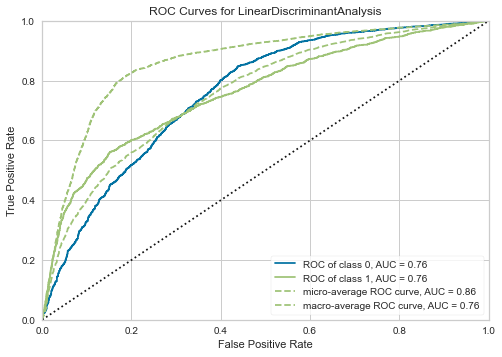

In [80]:
plot_model(lda_tune,"auc")

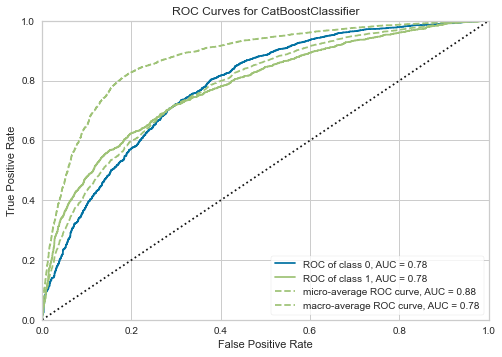

In [74]:
plot_model(catboost_tune,"auc")

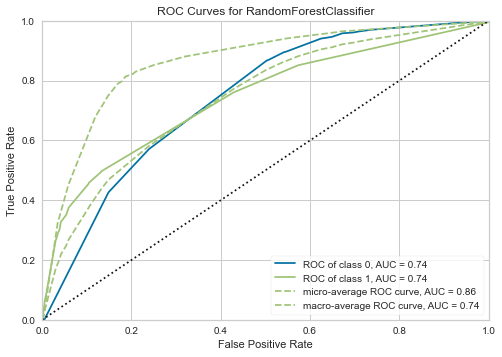

In [76]:
plot_model(rf_tune, plot = 'auc')

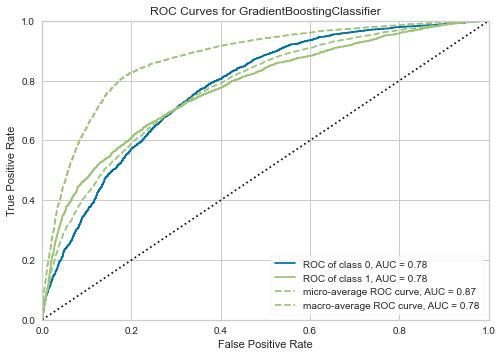

In [78]:
plot_model(gbc_tune, plot = 'auc')

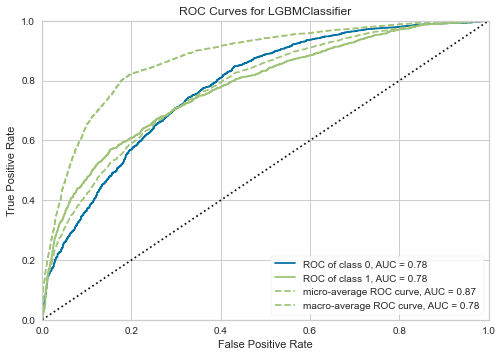

In [79]:
plot_model(tuned_lightgbm, plot='auc')

### PRECISION

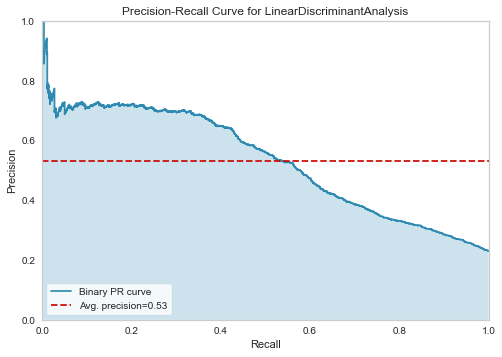

In [87]:
plot_model(lda_tune, plot = 'pr')

### IMPORTANCE DES FEATURES

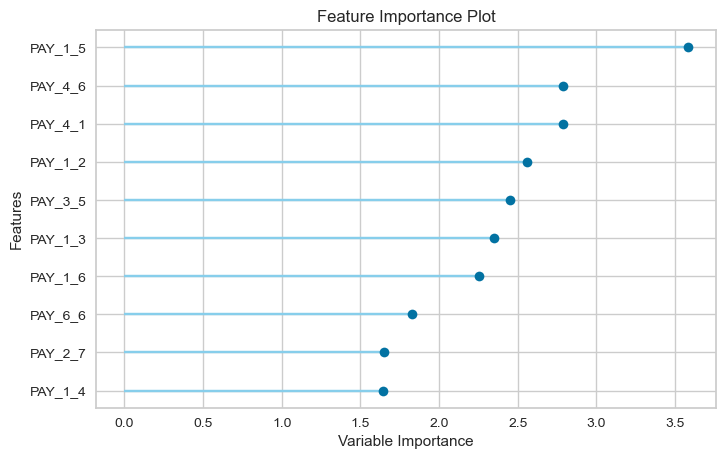

In [88]:
plot_model(lda_tune, plot = "feature")

### MATRICE DE CONFUSION

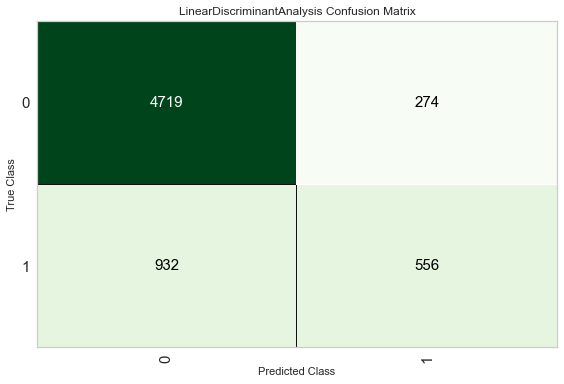

In [90]:
plot_model(lda_tune, plot = 'confusion_matrix')

In [106]:
evaluate_model(ridge_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [99]:
evaluate_model(lda_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [100]:
evaluate_model(rf_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### PREDICTION

In [104]:
pred_lda = predict_model(lda_tune,data=data_unseen)

In [105]:
pred_lda

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,320000,1,2,1,46,0,0,0,0,0,...,290003.0,15004.0,13004.0,13004.0,11120.0,11004.0,11010.0,0,0,0.9027
1,50000,1,3,2,47,0,0,0,0,0,...,18623.0,1263.0,1494.0,25105.0,728.0,651.0,624.0,0,0,0.9232
2,310000,1,1,1,45,-2,-2,-2,-2,-2,...,5451.0,14000.0,6129.0,6286.0,5539.0,5478.0,3613.0,0,0,0.9092
3,340000,1,1,1,49,-2,-2,-2,-2,-2,...,297.0,655.0,361.0,301.0,457.0,297.0,366.0,1,0,0.9061
4,280000,1,1,1,37,-1,-1,-1,-1,-1,...,29987.0,30422.0,1721.0,4428.0,2528.0,30135.0,8302.0,0,0,0.9254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,80000,1,2,2,34,2,2,2,2,2,...,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1,1,0.9744
2396,150000,1,3,2,43,-1,-1,-1,-1,0,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0.9159
2397,30000,1,2,2,37,4,3,2,-1,0,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,1,0.7454
2398,80000,1,3,1,41,1,-1,0,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0.8374


In [103]:
help(predict_model)#( final_rf );

Help on function predict_model in module pycaret.classification:

predict_model(estimator, data: Union[pandas.core.frame.DataFrame, NoneType] = None, probability_threshold: Union[float, NoneType] = None, encoded_labels: bool = False, round: int = 4, verbose: bool = True) -> pandas.core.frame.DataFrame
    This function predicts ``Label`` and ``Score`` (probability of predicted 
    class) using a trained model. When ``data`` is None, it predicts label and 
    score on the holdout set.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> pred_holdout = predict_model(lr)
    >>> pred_unseen = predict_model(lr, data = unseen_dataframe)
        
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    data: pandas.DataFrame
        Shape (n_samples,

In [ ]:
unseen_predictions  =  predictions_model ( final_rf ,  data = data_unseen ) 
unseen_predictions . tête ()

In [ ]:
save_model ( final_rf , 'Final RF Model 08Feb2020' )

In [ ]:
saved_final_rf  =  load_model ( 'Modèle RF final 08Feb2020' )

In [ ]:
new_prediction  =  predict_model ( saved_final_rf ,  data = data_unseen )

In [ ]:
new_prediction.head()